<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/01_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

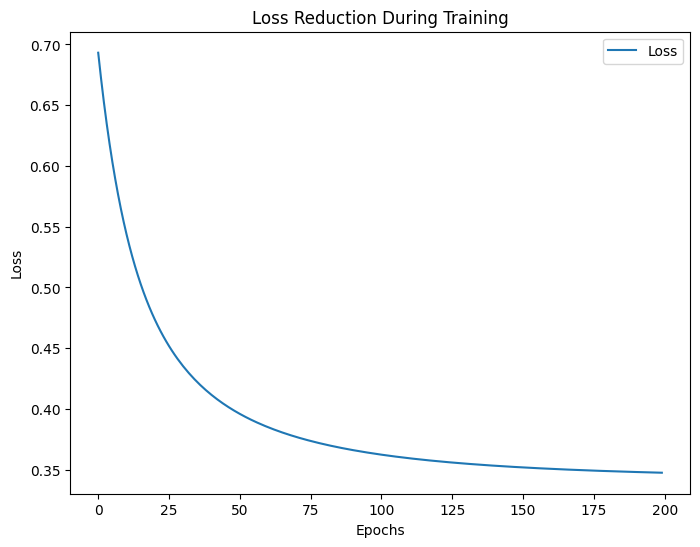

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
y = y.reshape(-1, 1)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

num_of_samples, num_of_features = X.shape
weights = np.zeros((num_of_features, 1))
biases = 0
losses = []
learning_rate = 0.1

num_of_epochs = 200
for epoch in range(num_of_epochs):
  z = np.dot(X, weights) + biases
  y_pred = sigmoid(z) # function to get prediciton
  loss = compute_loss(y, y_pred) # function to compute the loss
  losses.append(loss) # optional

  # gradients, getting the gradient value
  d_weights = (1 / num_of_samples) * np.dot(X.T, (y_pred - y))
  d_biases = (1 / num_of_samples) * np.sum(y_pred - y)

  weights -= learning_rate * d_weights # updating the weights accordingly
  biases -= learning_rate * d_biases # updating the biases accordingly

plt.figure(figsize=(8, 6))
plt.plot(range(num_of_epochs), losses, label="Loss")
plt.title("Loss Reduction During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Mindmap: Logistic Regression

| **Step**                   | **Standard Approach**                                                                                         | **Variants**                                                                                                               |
|----------------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **1. Read Data**           | Load dataset (e.g., `pandas.read_csv()`, `sklearn.datasets`).                                                | Handle missing values, normalize/standardize features, encode categorical features.                                       |
| **2. Identify Inputs and Labels (X, y)** | Split dataset into features and target labels.                                                                 | Encode labels, split into training/testing sets.                                                                          |
| **3. Initialize Hyperparameters** | Set learning rate (α) and number of epochs.                                                             | Use dynamic learning rate schedules.                                                                                      |
| **4. Initialize Parameters** | Initialize weights (w) and bias (b) (e.g., zeros or random values).                                      | Advanced initialization strategies (e.g., Xavier initialization).                                                         |
| **5. Run Epochs**          | Iterate through dataset for n_epochs.                                                        | Use full-batch, mini-batch, or stochastic gradient descent.                                                               |
| **6. Calculate Predictions (y_pred)** | Compute z = w^T * x + b, then apply sigmoid function: σ(z) = 1 / (1 + e^(-z)).                           | Experiment with other activation functions.                                                                               |
| **7. Calculate Loss**      | Binary Cross-Entropy: Loss = -(1/n) * Σ [ y_i log(y_pred_i) + (1-y_i) log(1-y_pred_i) ]. | Use squared loss for probabilities or other probabilistic loss functions.                                                |
| **8. Compute Gradients**   | Derive gradients for w and b: ∂Loss/∂w, ∂Loss/∂b. | Use auto-differentiation libraries (e.g., PyTorch, TensorFlow).                                                           |
| **9. Update Weights and Biases** | Apply gradient descent: w = w - α * (∂Loss/∂w), b = b - α * (∂Loss/∂b). | Use optimizers like Adam, SGD with momentum, or RMSProp.                                                                  |
| **10. Repeat Until Convergence** | Stop based on loss threshold, gradient magnitude, or early stopping.                                               |                                                                                                                           |
| **11. Evaluate Model**     | Use metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC, or Log-Loss.                                      |                                                                                                                           |
| **12. Save or Use Model**  | Save weights and biases using `pickle`, `joblib`, or export the entire model.                                   |                                                                                                                           |


## Linear Regression

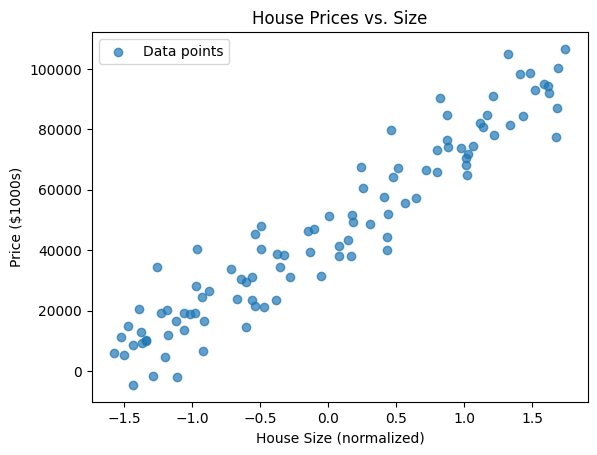

Epoch 0 Loss 3097188268.0919456
Epoch 100 Loss 133713021.65936846


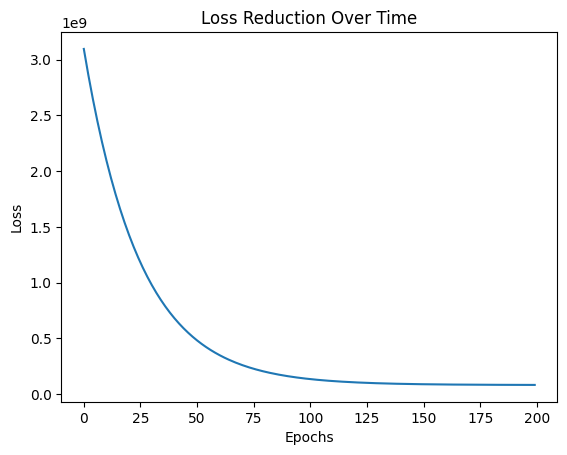

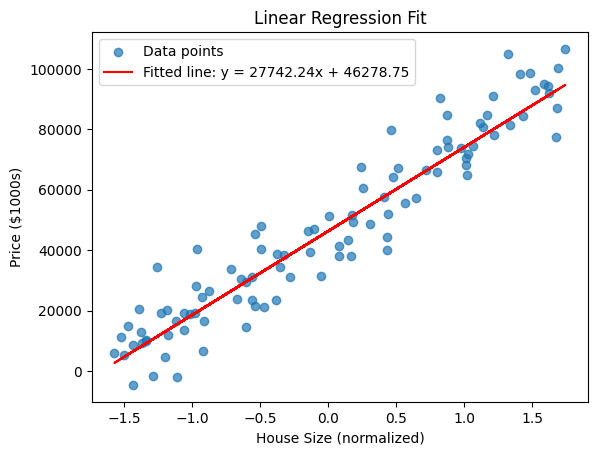

27742.237991397 46278.75057369873


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) * 2000 # House sizes between 0 and 2000 sq ft
true_weight, true_bias = 50, 100 # True slope (price per sq ft) and base price
y = true_weight * X + true_bias + np.random.randn(100, 1) * 10000

# Normalizing X for optimisation?
X = (X - X.mean()) / X.std()


# data set visualization
plt.scatter(X, y, alpha=0.7, label="Data points")
plt.xlabel("House Size (normalized)")
plt.ylabel("Price ($1000s)")
plt.title("House Prices vs. Size")
plt.legend()
plt.show()

# Initialize weights and bias
w = np.random.randn(1)
b = 0

# Hyperparameters
learning_rate = 0.01
epochs = 1000

def compute_loss(y, y_pred):
  return np.mean((y - y_pred) ** 2)

losses = []
num_of_epochs = 200
for epoch in range(num_of_epochs):
  y_pred = w * X + b
  loss = compute_loss(y, y_pred)
  losses.append(loss)

  # Backward pass, compared to logistic regression which was forward pass
  dw = -2 * np.mean(X * (y - y_pred))
  db = -2 * np.mean(y - y_pred)

  w -= learning_rate * dw
  b -= learning_rate * db

  if epoch % 100 == 0:
    print("Epoch", epoch, "Loss", loss)

plt.plot(range(num_of_epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Reduction Over Time")
plt.show()

plt.scatter(X, y, alpha=0.7, label="Data points")
plt.plot(X, w * X + b, color="red", label=f"Fitted line: y = {w[0]:.2f}x + {b:.2f}")
plt.xlabel("House Size (normalized)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

print(w[0], b)

### Mindmap: Linear Regression

| **Step**                   | **Standard Approach**                                                                                       | **Variants**                                                                                                   |
|----------------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **1. Read Data**           | Load dataset (e.g., `pandas.read_csv()`, `sklearn.datasets`).                                              | Handle missing values, normalize/standardize features.                                                       |
| **2. Identify Inputs and Output (X, y)** | Split dataset into features and target variable.                                                               | Add polynomial features for non-linear regression, split into training/testing.                              |
| **3. Initialize Hyperparameters** | Set learning rate (α) and number of epochs.                                                           | Use dynamic learning rates or momentum-based updates.                                                        |
| **4. Initialize Parameters** | Initialize weights (w) and bias (b) (e.g., zeros or random values).                                  | Advanced initialization methods.                                                                             |
| **5. Run Epochs**          | Iterate through dataset for n_epochs.                                                      | Use mini-batch, full-batch, or stochastic gradient descent.                                                  |
| **6. Predict (y_pred)** | Compute: y_pred = w^T * x + b.                                                               | Experiment with additional feature transformations.                                                          |
| **7. Calculate Loss**      | Mean Squared Error (MSE): Loss = (1/n) * Σ (y_i - y_pred_i)^2.                   | Mean Absolute Error (MAE), Huber loss for robust regression.                                                 |
| **8. Compute Gradients**   | Derive gradients for w and b: ∂Loss/∂w, ∂Loss/∂b. | Use tools like PyTorch's `autograd`.                                                                         |
| **9. Update Parameters**   | Apply gradient descent: w = w - α * (∂Loss/∂w), b = b - α * (∂Loss/∂b). | Use optimizers like Adam or RMSProp.                                                                         |
| **10. Repeat Until Convergence** | Stop based on loss threshold, validation performance, or early stopping.                                             |                                                                                                               |
| **11. Evaluate Model**     | Use metrics: RMSE, R^2, residual plots, or adjusted R^2.                                        |                                                                                                               |
| **12. Save or Use Model**  | Save parameters using `pickle`, `joblib`, or export as an ONNX model.                                       |                                                                                                               |


### Example - Housing dataset

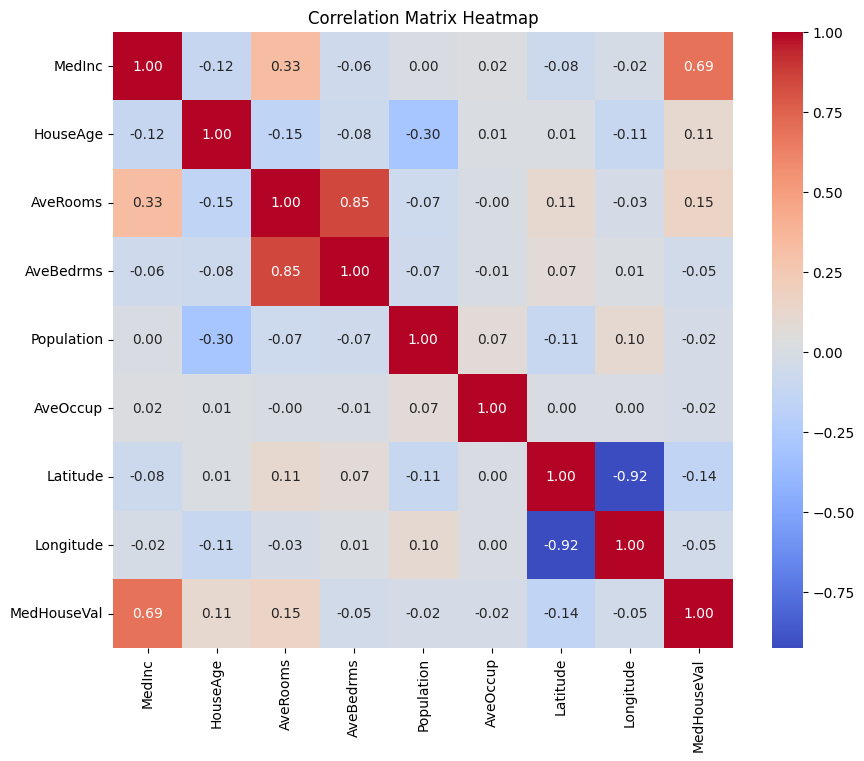


Example of feature values before scaling (first 5 rows of X_train):
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  

Example of feature values after scaling (first 5 rows of X_train):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -

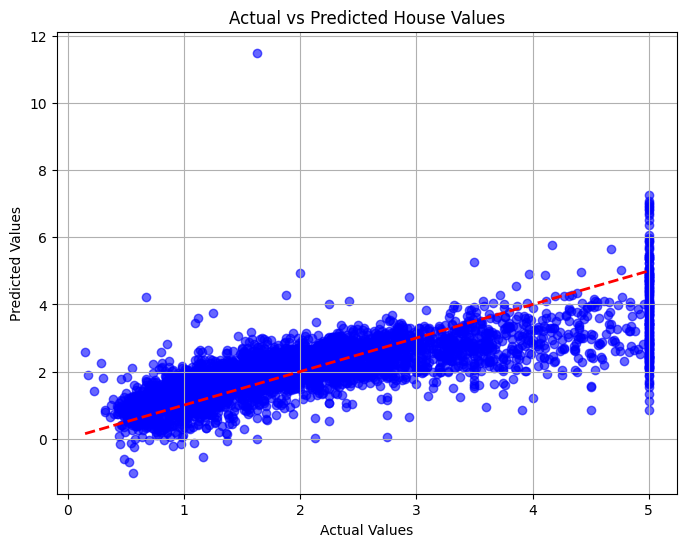

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nExample of feature values before scaling (first 5 rows of X_train):")
print(pd.DataFrame(X_train, columns=X.columns).head())

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nExample of feature values after scaling (first 5 rows of X_train):")
print(pd.DataFrame(X_train, columns=X.columns).head())

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted House Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


### Example - Housing dataset with different variations

### Boston Dataset

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


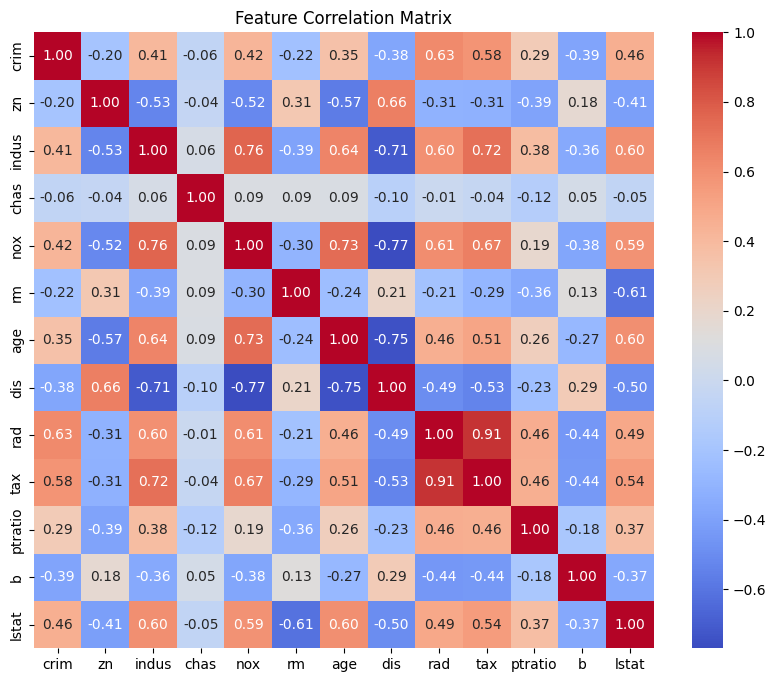

Baseline Linear Regression
R² Score: 0.6387
Mean Squared Error: 26.4989
Polynomial Regression (Degree=2)
R² Score: 0.7789
Mean Squared Error: 16.2136
Ridge Regression
R² Score: 0.6390
Mean Squared Error: 26.4770
Lasso Regression
R² Score: 0.6380
Mean Squared Error: 26.5464


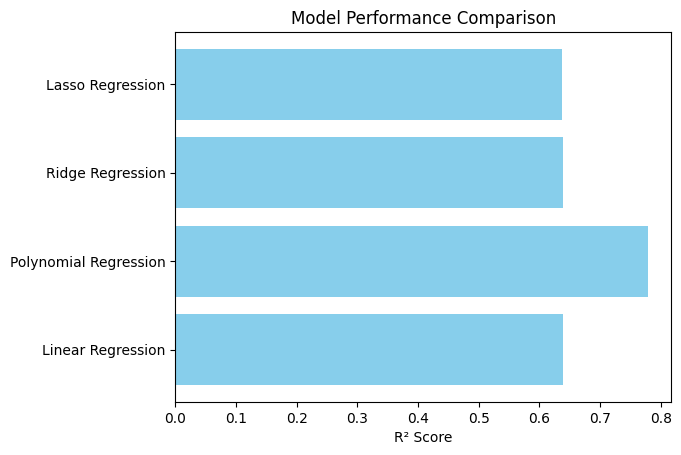

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

print(data.head())

X = data.drop("medv", axis=1)
y = data["medv"]

plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# high correlation features might confuse the model
X = X.drop(["tax", "rad"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression basic
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Baseline Linear Regression")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

# 2. Using polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

print("Polynomial Regression (Degree=2)")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.4f}")

# 3. Using Regularization: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge Regression")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.4f}")


# 4. Using Regularization: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso Regression")
print(f"R² Score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso):.4f}")

models = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression"]
scores = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_poly),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso)
]

plt.barh(models, scores, color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Performance Comparison")
plt.show()


#### Notes from above exercise
1.**Why did we leave the features with high correlation?** <br/>

2.**Using polynomial features** <br/>

3.**Use of R2 (Coefficient of Determination)**

4.**Mean Squared Error (MSE)**:

High R2R2 (closer to 1).

Low MSE (close to 0).

5.**Regularization**
 - Lasso Regression, using L1 Penalty
 - Ridge Regression, using L2 Penalty


## Logistic Regression vs Linear Regression

| **Aspect**                   | **Linear Regression**             | **Logistic Regression**             |
|------------------------------|-----------------------------------------------------|------------------------------------------------------|
| **Type of Problem**           | Regression (continuous output)                     | Classification (binary output)                        |
| **Prediction Output**         | Continuous value (e.g., house price)               | Probability between 0 and 1 (class prediction)       |
| **Activation Function**       | None (direct weighted sum)                         | Sigmoid function                                      |
| **Loss Function**             | Mean squared error (MSE)                           | Binary cross-entropy (log loss)                       |
| **Optimization Goal**         | Minimize MSE (squared difference)                  | Minimize log loss (binary cross-entropy)              |
| **Gradient Calculation**      | Based on MSE                                       | Based on log loss and sigmoid function                |
| **Use Cases**                 | Predicting continuous values (e.g., prices)        | Binary classification (e.g., spam or not)             |
